In [ ]:
library(wordcloud2)
library(RColorBrewer)
library(dplyr)

data <- read.csv("Housing.csv")

In [4]:
head(data)

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [8]:
library(dplyr)
library(tidyr) 

In [9]:
yes_counts <- data %>%
  summarise(
    mainroad = sum(mainroad == "yes"),
    guestroom = sum(guestroom == "yes"),
    basement = sum(basement == "yes"),
    hotwaterheating = sum(hotwaterheating == "yes"),
    airconditioning = sum(airconditioning == "yes"),
    prefarea = sum(prefarea == "yes")
  ) %>%
  gather(key = "feature", value = "yes_count")  # Reshape into long format

# Convert to data frame for wordcloud2
word_freq_df <- data.frame(word = yes_counts$feature, freq = yes_counts$yes_count)

# Create word cloud
wordcloud2(word_freq_df)

HTML widgets cannot be represented in plain text (need html)

Most of the housing areas have an access to mainroad,that is what the genral trend/requirement of every potential customer could be.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


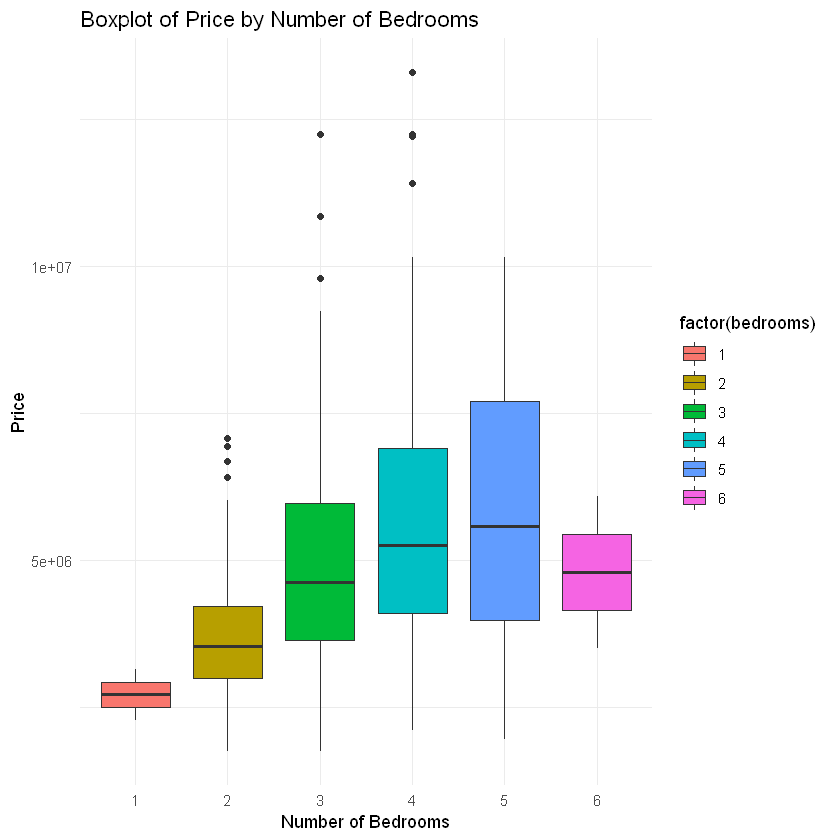

In [10]:
library(ggplot2)

# Boxplot for price by number of bedrooms
ggplot(data, aes(x = factor(bedrooms), y = price)) + 
  geom_boxplot(aes(fill = factor(bedrooms))) + 
  labs(title = "Boxplot of Price by Number of Bedrooms", x = "Number of Bedrooms", y = "Price") +
  theme_minimal()


As the number of bedrooms increases from 1 to 5, there is a clear increase in the median price.As the number of bedrooms increases from 1 to 5, there is a clear increase in the median price.For 6-bedroom homes, the price range decreases compared to 5-bedroom homes, which might suggest a limited number of data points or less variability in price.

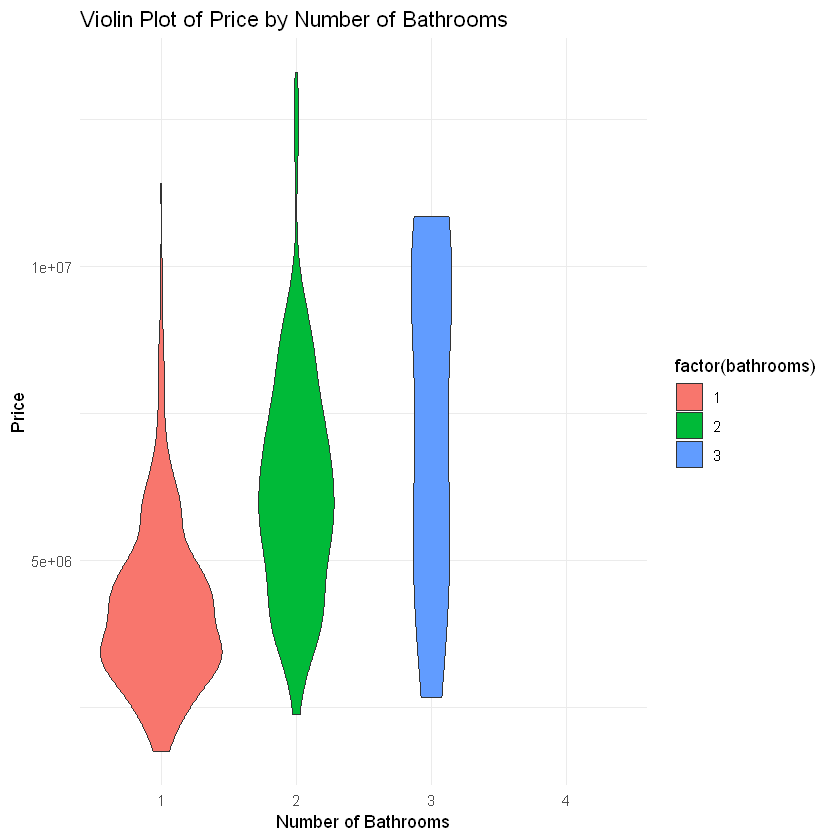

In [11]:
# Violin plot for price distribution by number of bathrooms
ggplot(data, aes(x = factor(bathrooms), y = price)) + 
  geom_violin(aes(fill = factor(bathrooms))) + 
  labs(title = "Violin Plot of Price by Number of Bathrooms", x = "Number of Bathrooms", y = "Price") +
  theme_minimal()


As the number of bathrooms increases, prices become more concentrated, with fewer lower-priced homes being available.The overall price distribution widens with 2-bathroom homes, reflecting a variety of price points, but becomes more consistent again with 3-bathroom homes.

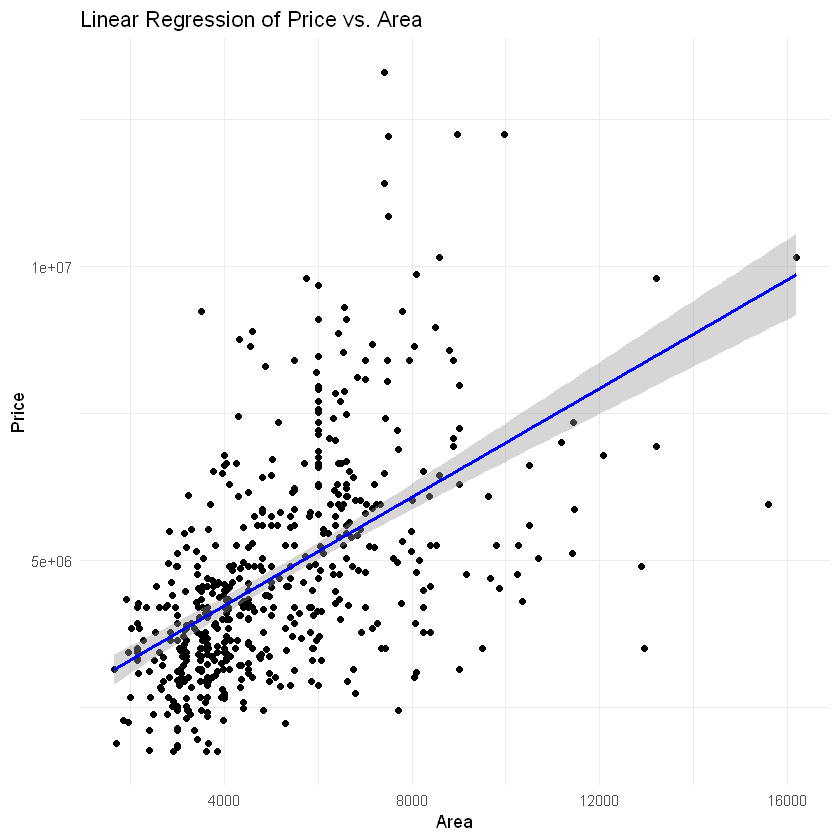

In [12]:
# Linear regression plot for area vs. price
ggplot(data, aes(x = area, y = price)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression of Price vs. Area", x = "Area", y = "Price") +
  theme_minimal()


The linear regression plot shows a positive correlation between Price and Area, suggesting that as the Area of a property increases, so does its Price. The regression line indicates a linear relationship between the two variables, with some scatter around the line due to other factors influencing Price.

In [16]:
install.packages("scatterplot3d")


Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"installing the source package 'scatterplot3d'



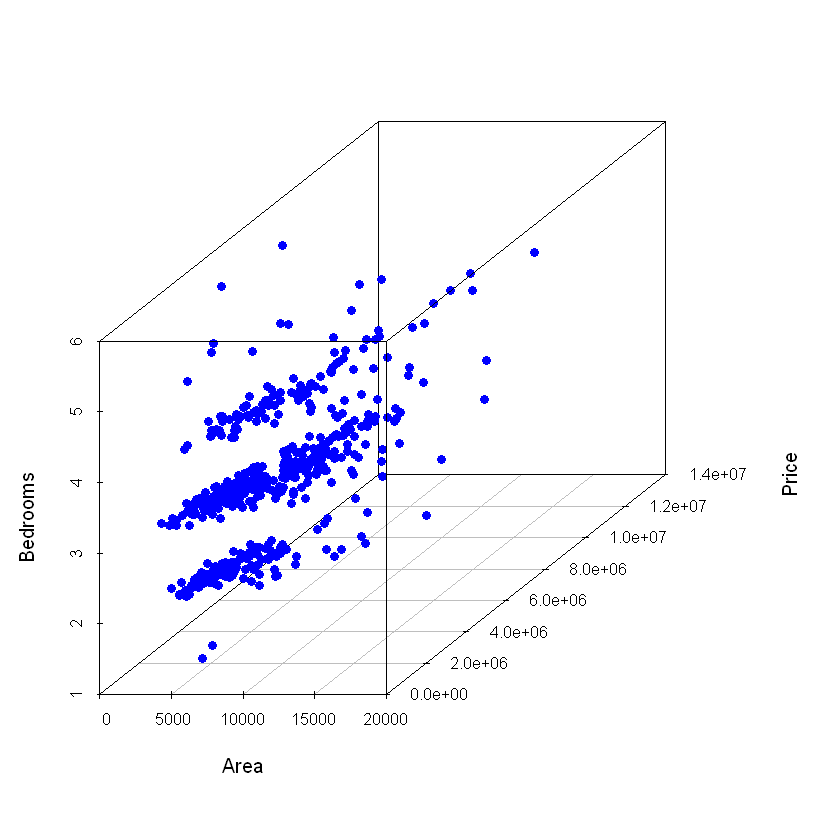

In [17]:
library(scatterplot3d)

# 3D scatter plot for area, price, and number of bedrooms
scatterplot3d(data$area, data$price, data$bedrooms, pch = 16, color = "blue", 
              xlab = "Area", ylab = "Price", zlab = "Bedrooms")


There is a positive correlation among all three variables indicating asArea and Bedrooms increase, Price generally tends to increase as well. However, there is also some variation around this trend, suggesting that other factors may influence the Price.

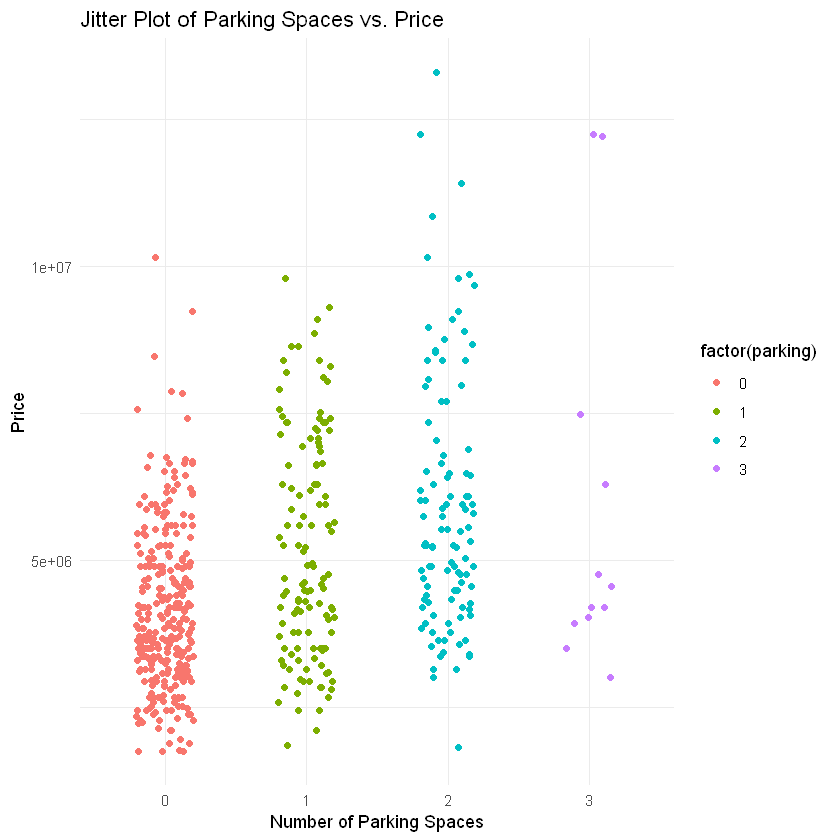

In [15]:
# Jitter plot for parking spaces vs. price
ggplot(data, aes(x = factor(parking), y = price)) + 
  geom_jitter(aes(color = factor(parking)), width = 0.2, height = 0) +
  labs(title = "Jitter Plot of Parking Spaces vs. Price", x = "Number of Parking Spaces", y = "Price") +
  theme_minimal()
